In [309]:

import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

# import the dataset andplace them as train and test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Explore the data

In [310]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


We have 50000 training and 10000 test images in the dataset. The images have a structure of (32,32,3) which correspond to (width, height, RGB).

For each image there is a corresponding label, which is a class index.

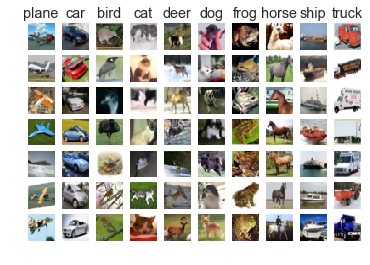

In [311]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [312]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255


# MLP here has two hidden layers with 256 neurons and a learning rate of 0.01 
We are going to use a Multilayer Perceptron to classify our images.

Instead of class indices we will use one-hot encoded vectors to represent the labels of the samples. We also need to vectorize the images, since the MLP will take a 3072-dimensional vector as the input. When working with images, a simple way to normalize our data is to fit it within the 0 to 1 range.

In [361]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization

 # create model

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

#comiple model
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    92.0%
                relu   #####         256
               Dense   XXXXX -------------------     65792     7.7%
                relu   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [362]:
len(model.layers)

3

In [363]:
model.count_params()

855050

# Train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples 

In [364]:
# input the dataset into created model
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 26s - loss: 1.8277 - acc: 0.3387 - val_loss: 1.7062 - val_acc: 0.3915
Epoch 2/15
 - 15s - loss: 1.6556 - acc: 0.4069 - val_loss: 1.6381 - val_acc: 0.4253
Epoch 3/15
 - 15s - loss: 1.5832 - acc: 0.4333 - val_loss: 1.5674 - val_acc: 0.4457
Epoch 4/15
 - 13s - loss: 1.5309 - acc: 0.4490 - val_loss: 1.6010 - val_acc: 0.4320
Epoch 5/15
 - 13s - loss: 1.4992 - acc: 0.4634 - val_loss: 1.5549 - val_acc: 0.4522
Epoch 6/15
 - 13s - loss: 1.4680 - acc: 0.4732 - val_loss: 1.5321 - val_acc: 0.4595
Epoch 7/15
 - 13s - loss: 1.4363 - acc: 0.4850 - val_loss: 1.5668 - val_acc: 0.4558
Epoch 8/15
 - 13s - loss: 1.4142 - acc: 0.4918 - val_loss: 1.5146 - val_acc: 0.4744
Epoch 9/15
 - 13s - loss: 1.3899 - acc: 0.4979 - val_loss: 1.5076 - val_acc: 0.4758
Epoch 10/15
 - 13s - loss: 1.3682 - acc: 0.5091 - val_loss: 1.5287 - val_acc: 0.4673
Epoch 11/15
 - 13s - loss: 1.3463 - acc: 0.5159 - val_loss: 1.5328 - val_acc: 0.4624
Epoch 12/15
 - 13s - los

In [365]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256neurons--
learning rate 0.01--RELU--15 Epochs--Bacth size 32--


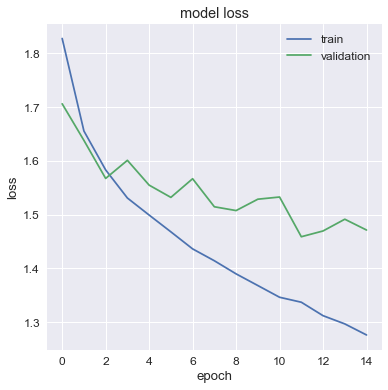

In [379]:
#plot the model loss
print('Model Loss for MLP with two hidden Layers--256neurons--')
print('learning rate 0.01--RELU--15 Epochs--Bacth size 32--')    
plotLosses(history)

# Evaluating the model for loss and accuracy¶

In [367]:
# evaluate the model
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [369]:
# calculating loss and accuracy
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4662031574249268, 0.4842]


# MLP here has two hidden layers with 128 neurons and a learning rate of 0.01
# Activation Function = RELU

In [381]:
#learning rate=0.01
# create model
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=3072))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    393344    95.7%
                relu   #####         128
               Dense   XXXXX -------------------     16512     4.0%
                relu   #####         128
               Dense   XXXXX -------------------      1290     0.3%
             softmax   #####          10


# Train the model for 15 epochs, using a batch size of 32 and a validation split of 0.2. The latter means that 20% of our training data will be used as validation samples

In [382]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 11s - loss: 1.8493 - acc: 0.3311 - val_loss: 1.7200 - val_acc: 0.3845
Epoch 2/15
 - 8s - loss: 1.6838 - acc: 0.3939 - val_loss: 1.6538 - val_acc: 0.4088
Epoch 3/15
 - 8s - loss: 1.6138 - acc: 0.4218 - val_loss: 1.6392 - val_acc: 0.4196
Epoch 4/15
 - 9s - loss: 1.5738 - acc: 0.4380 - val_loss: 1.6099 - val_acc: 0.4266
Epoch 5/15
 - 8s - loss: 1.5444 - acc: 0.4492 - val_loss: 1.6126 - val_acc: 0.4329
Epoch 6/15
 - 8s - loss: 1.5223 - acc: 0.4553 - val_loss: 1.6269 - val_acc: 0.4261
Epoch 7/15
 - 8s - loss: 1.5002 - acc: 0.4642 - val_loss: 1.6059 - val_acc: 0.4328
Epoch 8/15
 - 8s - loss: 1.4905 - acc: 0.4661 - val_loss: 1.5608 - val_acc: 0.4430
Epoch 9/15
 - 7s - loss: 1.4712 - acc: 0.4742 - val_loss: 1.5773 - val_acc: 0.4414
Epoch 10/15
 - 7s - loss: 1.4589 - acc: 0.4778 - val_loss: 1.5343 - val_acc: 0.4613
Epoch 11/15
 - 7s - loss: 1.4415 - acc: 0.4851 - val_loss: 1.5599 - val_acc: 0.4482
Epoch 12/15
 - 7s - loss: 1.4305 -

In [383]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--128 neurons--
learning rate 0.01--RELU--15 Epochs--Bacth size 32--


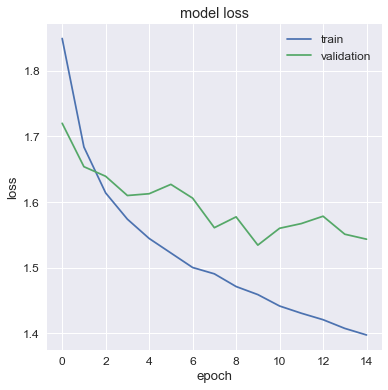

In [384]:
print('Model Loss for MLP with two hidden Layers--128 neurons--')
print('learning rate 0.01--RELU--15 Epochs--Bacth size 32--') 
plotLosses(history)

In [385]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [386]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.5176688331604005, 0.4625]


# Confusion Matrix

In [387]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('----------------Confusion Matrix----------------')
print(conf_mat)

----------------Confusion Matrix----------------
[[632  49  25  18  34  13  29  18 120  62]
 [ 33 677   4  10   8  19  18  14  36 181]
 [116  39 265  72 161 116 132  48  19  32]
 [ 40  38  66 266  63 220 154  53  31  69]
 [ 73  16  98  39 470  62 132  61  25  24]
 [ 32  31  63 138  78 451  97  53  18  39]
 [ 14  30  36  55 119  61 626  15  16  28]
 [ 41  34  42  48 102  84  38 518   9  84]
 [116 102   6  14  21  22   8   9 619  83]
 [ 41 195   6  23   9  23  21  31  39 612]]


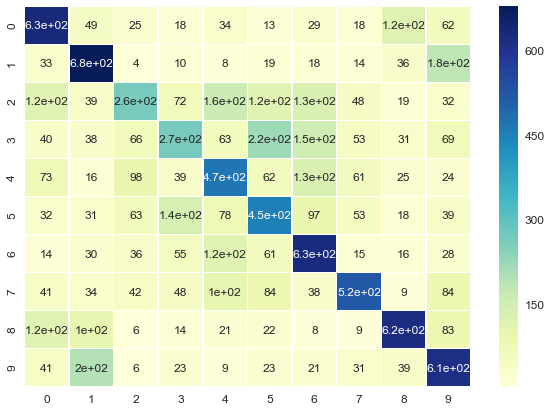

In [388]:
#visualising the confusion matrix

import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()



# Leraning Rate = 0.001

In [394]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    92.0%
                relu   #####         256
               Dense   XXXXX -------------------     65792     7.7%
                relu   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [395]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 18s - loss: 1.8827 - acc: 0.3306 - val_loss: 1.7442 - val_acc: 0.3845
Epoch 2/15
 - 15s - loss: 1.6880 - acc: 0.4019 - val_loss: 1.6586 - val_acc: 0.4147
Epoch 3/15
 - 15s - loss: 1.6052 - acc: 0.4334 - val_loss: 1.6218 - val_acc: 0.4309
Epoch 4/15
 - 16s - loss: 1.5495 - acc: 0.4501 - val_loss: 1.6186 - val_acc: 0.4273
Epoch 5/15
 - 15s - loss: 1.5060 - acc: 0.4684 - val_loss: 1.5444 - val_acc: 0.4513
Epoch 6/15
 - 14s - loss: 1.4707 - acc: 0.4772 - val_loss: 1.5155 - val_acc: 0.4646
Epoch 7/15
 - 17s - loss: 1.4372 - acc: 0.4904 - val_loss: 1.5069 - val_acc: 0.4731
Epoch 8/15
 - 15s - loss: 1.4075 - acc: 0.5014 - val_loss: 1.4790 - val_acc: 0.4736
Epoch 9/15
 - 15s - loss: 1.3827 - acc: 0.5092 - val_loss: 1.4866 - val_acc: 0.4771
Epoch 10/15
 - 15s - loss: 1.3585 - acc: 0.5186 - val_loss: 1.4441 - val_acc: 0.4940
Epoch 11/15
 - 14s - loss: 1.3343 - acc: 0.5278 - val_loss: 1.4742 - val_acc: 0.4827
Epoch 12/15
 - 15s - los

In [396]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256 neurons--
learning rate 0.001--RELU--15 Epochs--Bacth size 32--


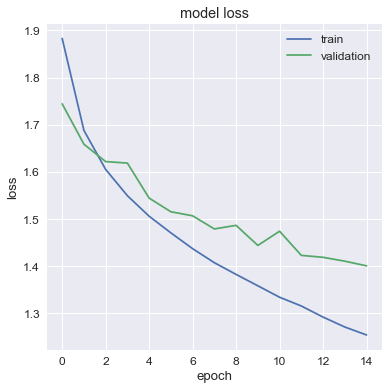

In [397]:
print('Model Loss for MLP with two hidden Layers--256 neurons--')
print('learning rate 0.001--RELU--15 Epochs--Bacth size 32--') 
plotLosses(history)

In [398]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [399]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.3870390169143676, 0.5152]


In [400]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('----------------Confusion Matrix----------------')
print(conf_mat)

----------------Confusion Matrix----------------
[[632  49  25  18  34  13  29  18 120  62]
 [ 33 677   4  10   8  19  18  14  36 181]
 [116  39 265  72 161 116 132  48  19  32]
 [ 40  38  66 266  63 220 154  53  31  69]
 [ 73  16  98  39 470  62 132  61  25  24]
 [ 32  31  63 138  78 451  97  53  18  39]
 [ 14  30  36  55 119  61 626  15  16  28]
 [ 41  34  42  48 102  84  38 518   9  84]
 [116 102   6  14  21  22   8   9 619  83]
 [ 41 195   6  23   9  23  21  31  39 612]]


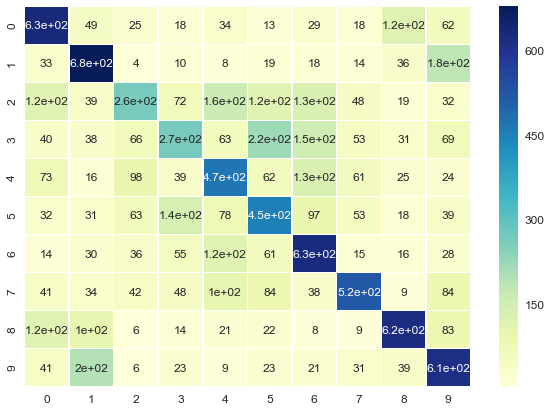

In [401]:
#visualising the confusion matrix

import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()


# Activation Function = sigmoid

In [404]:
model = Sequential()

model.add(Dense(256, activation='sigmoid', input_dim=3072))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    92.0%
             sigmoid   #####         256
               Dense   XXXXX -------------------     65792     7.7%
             sigmoid   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [405]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 18s - loss: 2.2614 - acc: 0.1695 - val_loss: 2.2073 - val_acc: 0.2238
Epoch 2/15
 - 15s - loss: 2.1392 - acc: 0.2437 - val_loss: 2.0788 - val_acc: 0.2607
Epoch 3/15
 - 15s - loss: 2.0334 - acc: 0.2817 - val_loss: 2.0026 - val_acc: 0.2917
Epoch 4/15
 - 14s - loss: 1.9655 - acc: 0.3031 - val_loss: 1.9491 - val_acc: 0.3030
Epoch 5/15
 - 14s - loss: 1.9242 - acc: 0.3145 - val_loss: 1.9219 - val_acc: 0.3094
Epoch 6/15
 - 15s - loss: 1.8970 - acc: 0.3259 - val_loss: 1.9012 - val_acc: 0.3216
Epoch 7/15
 - 14s - loss: 1.8752 - acc: 0.3365 - val_loss: 1.8815 - val_acc: 0.3353
Epoch 8/15
 - 15s - loss: 1.8569 - acc: 0.3436 - val_loss: 1.8596 - val_acc: 0.3435
Epoch 9/15
 - 13s - loss: 1.8399 - acc: 0.3498 - val_loss: 1.8506 - val_acc: 0.3439
Epoch 10/15
 - 17s - loss: 1.8247 - acc: 0.3544 - val_loss: 1.8386 - val_acc: 0.3556
Epoch 11/15
 - 14s - loss: 1.8100 - acc: 0.3606 - val_loss: 1.8236 - val_acc: 0.3580
Epoch 12/15
 - 14s - los

In [406]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256 neurons--
learning rate 0.001--Sigmoid--15 Epochs--Bacth size 32--


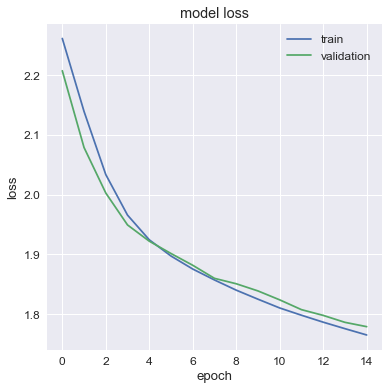

In [407]:
print('Model Loss for MLP with two hidden Layers--256 neurons--')
print('learning rate 0.001--Sigmoid--15 Epochs--Bacth size 32--') 
plotLosses(history)

In [408]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [409]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.7589356643676757, 0.3844]


In [411]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
conf_mat = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print('----------------Confusion Matrix----------------')
print(conf_mat)

----------------Confusion Matrix----------------
[[632  49  25  18  34  13  29  18 120  62]
 [ 33 677   4  10   8  19  18  14  36 181]
 [116  39 265  72 161 116 132  48  19  32]
 [ 40  38  66 266  63 220 154  53  31  69]
 [ 73  16  98  39 470  62 132  61  25  24]
 [ 32  31  63 138  78 451  97  53  18  39]
 [ 14  30  36  55 119  61 626  15  16  28]
 [ 41  34  42  48 102  84  38 518   9  84]
 [116 102   6  14  21  22   8   9 619  83]
 [ 41 195   6  23   9  23  21  31  39 612]]


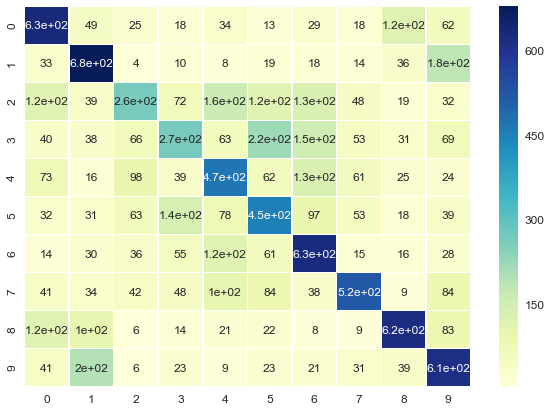

In [412]:
#visualising the confusion matrix

import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()

# Activation Function = tanh

In [413]:
model = Sequential()

model.add(Dense(256, activation='tanh', input_dim=3072))
model.add(Dense(256, activation='tanh'))
model.add(Dense(10, activation='tanh'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    92.0%
                tanh   #####         256
               Dense   XXXXX -------------------     65792     7.7%
                tanh   #####         256
               Dense   XXXXX -------------------      2570     0.3%
                tanh   #####          10


In [414]:
history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
 - 17s - loss: 7.8716 - acc: 0.0990 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 2/15
 - 15s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 3/15
 - 15s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 4/15
 - 15s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 5/15
 - 14s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 6/15
 - 13s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 7/15
 - 14s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 8/15
 - 14s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 9/15
 - 15s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 10/15
 - 14s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 11/15
 - 16s - loss: 7.9140 - acc: 0.0996 - val_loss: 8.0333 - val_acc: 0.1013
Epoch 12/15
 - 13s - los

In [415]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256 neurons--
learning rate 0.001--tanh--15 Epochs--Bacth size 32--


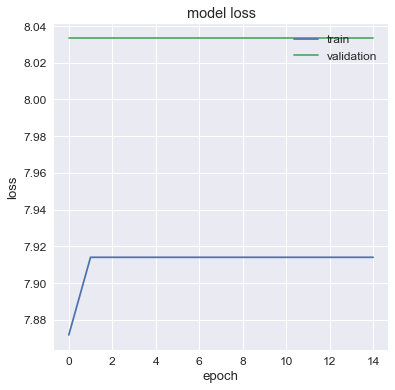

In [416]:
print('Model Loss for MLP with two hidden Layers--256 neurons--')
print('learning rate 0.001--tanh--15 Epochs--Bacth size 32--') 
plotLosses(history)

In [417]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [424]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[7.963951226806641, 0.1]


# Epoch = 10

In [419]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) #Stochastic gradient descent optimizer.

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####        3072
               Dense   XXXXX -------------------    786688    92.0%
                relu   #####         256
               Dense   XXXXX -------------------     65792     7.7%
                relu   #####         256
               Dense   XXXXX -------------------      2570     0.3%
             softmax   #####          10


In [421]:
history = model.fit(X_train,y_train, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 16s - loss: 1.8497 - acc: 0.3456 - val_loss: 1.7944 - val_acc: 0.3582
Epoch 2/10
 - 15s - loss: 1.6930 - acc: 0.4049 - val_loss: 1.6771 - val_acc: 0.4095
Epoch 3/10
 - 15s - loss: 1.6122 - acc: 0.4320 - val_loss: 1.6135 - val_acc: 0.4323
Epoch 4/10
 - 16s - loss: 1.5593 - acc: 0.4502 - val_loss: 1.5889 - val_acc: 0.4439
Epoch 5/10
 - 18s - loss: 1.5151 - acc: 0.4656 - val_loss: 1.5685 - val_acc: 0.4464
Epoch 6/10
 - 18s - loss: 1.4785 - acc: 0.4778 - val_loss: 1.5416 - val_acc: 0.4532
Epoch 7/10
 - 15s - loss: 1.4434 - acc: 0.4914 - val_loss: 1.5197 - val_acc: 0.4606
Epoch 8/10
 - 17s - loss: 1.4156 - acc: 0.5006 - val_loss: 1.4963 - val_acc: 0.4673
Epoch 9/10
 - 16s - loss: 1.3849 - acc: 0.5114 - val_loss: 1.4965 - val_acc: 0.4703
Epoch 10/10
 - 16s - loss: 1.3620 - acc: 0.5187 - val_loss: 1.4693 - val_acc: 0.4866


In [422]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256 neurons--
learning rate 0.001--relu--10 Epochs--Bacth size 32--


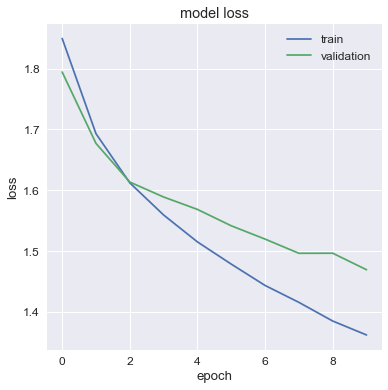

In [423]:
print('Model Loss for MLP with two hidden Layers--256 neurons--')
print('learning rate 0.001--relu--10 Epochs--Bacth size 32--') 
plotLosses(history)

In [425]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [426]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.4401733558654786, 0.4928]


# Epoch = 20

In [442]:
history = model.fit(X_train,y_train, epochs=20, batch_size=32, verbose=2, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 14s - loss: 0.6390 - acc: 0.7795 - val_loss: 1.5474 - val_acc: 0.5316
Epoch 2/20
 - 15s - loss: 0.6301 - acc: 0.7840 - val_loss: 1.5639 - val_acc: 0.5356
Epoch 3/20
 - 16s - loss: 0.6148 - acc: 0.7875 - val_loss: 1.5802 - val_acc: 0.5319
Epoch 4/20
 - 20s - loss: 0.6051 - acc: 0.7913 - val_loss: 1.5881 - val_acc: 0.5317
Epoch 5/20
 - 15s - loss: 0.5921 - acc: 0.7978 - val_loss: 1.6369 - val_acc: 0.5296
Epoch 6/20
 - 16s - loss: 0.5764 - acc: 0.7997 - val_loss: 1.6369 - val_acc: 0.5294
Epoch 7/20
 - 15s - loss: 0.5675 - acc: 0.8036 - val_loss: 1.7023 - val_acc: 0.5156
Epoch 8/20
 - 14s - loss: 0.5536 - acc: 0.8103 - val_loss: 1.6954 - val_acc: 0.5257
Epoch 9/20
 - 16s - loss: 0.5405 - acc: 0.8133 - val_loss: 1.6704 - val_acc: 0.5279
Epoch 10/20
 - 15s - loss: 0.5294 - acc: 0.8184 - val_loss: 1.6643 - val_acc: 0.5327
Epoch 11/20
 - 15s - loss: 0.5219 - acc: 0.8187 - val_loss: 1.7279 - val_acc: 0.5256
Epoch 12/20
 - 14s - los

In [443]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

Model Loss for MLP with two hidden Layers--256 neurons--
learning rate 0.001--relu--20 Epochs--Bacth size 32--


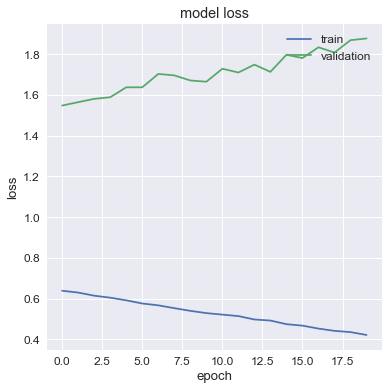

In [444]:
print('Model Loss for MLP with two hidden Layers--256 neurons--')
print('learning rate 0.001--relu--20 Epochs--Bacth size 32--') 
plotLosses(history)

In [445]:
score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

In [446]:
print(model.metrics_names)
print(score)

['loss', 'acc']
[1.8536379692077636, 0.5236]
